Step 1: Import Packages, Functions, and Classes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Step 2: load Data

In [2]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [3]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [4]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Step 3: Create a Model and Train It

In [5]:
model = LogisticRegression(solver='liblinear', random_state=0)

The above statement creates an instance of LogisticRegression and binds its references to the variable model. LogisticRegression has several optional parameters that define the behavior of the model and approach:

* penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

* dual is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).

* tol is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.

* C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.

* fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).

* intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.

* class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.

* random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.

* solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.

* max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.

* multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.

* verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.

* warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.

* n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.

*  l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

In [6]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [7]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

In [8]:
model.classes_

array([0, 1])

In [9]:
model.intercept_

array([-1.04608067])

In [10]:
model.coef_

array([[0.51491375]])

Step 4: Evaluate the Model

In [11]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():

In [12]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [13]:
model.score(x, y)

0.9

In [14]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

In [15]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Improve the Model

You can improve your model by setting different parameters. For example, let’s work with the regularization strength C equal to 10.0, instead of the default value of 1.0:



In [16]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [17]:
model.intercept_

array([-3.51335372])

In [18]:
model.coef_

array([[1.12066084]])

In [19]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [20]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [21]:
model.score(x, y)

1.0

In [22]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [23]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Logistic Regression in Python With scikit-learn: Example 2

In [24]:
# Step 1: Import packages, functions, and classes
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Get data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

# Step 3: Create a model and train it
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

# Step 4: Evaluate the model
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [27]:
score_

0.8

In [26]:
print(report)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10



Logistic Regression in Python: Handwriting Recognition


The next example will show you how to use logistic regression to solve a real-world classification problem. The approach is very similar to what you’ve already seen, but with a larger dataset and several additional concerns.

This example is about image recognition. To be more precise, you’ll work on the recognition of handwritten digits. You’ll use a dataset with 1797 observations, each of which is an image of one handwritten digit. Each image has 64 px, with a width of 8 px and a height of 8 px.

The inputs (𝐱) are vectors with 64 dimensions or values. Each input vector describes one image. Each of the 64 values represents one pixel of the image. The input values are the integers between 0 and 16, depending on the shade of gray for the corresponding pixel. The output (𝑦) for each observation is an integer between 0 and 9, consistent with the digit on the image. There are ten classes in total, each corresponding to one image.

Step 1: Import Packages

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Step 2a: Get Data

In [29]:
x, y = load_digits(return_X_y=True)

In [30]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [31]:
y

array([0, 1, 2, ..., 8, 9, 8])

Step 2b: Split Data

It’s a good and widely-adopted practice to split the dataset you’re working with into two subsets. These are the training set and the test set. This split is usually performed randomly. You should use the training set to fit your model. Once the model is fitted, you evaluate its performance with the test set. It’s important not to use the test set in the process of fitting the model. This approach enables an unbiased evaluation of the model

In [32]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=0)

Step 2c: Scale Data

Standardization is the process of transforming data in a way such that the mean of each column becomes equal to zero, and the standard deviation of each column is one. This way, you obtain the same scale for all columns. Take the following steps to standardize your data:

1. Calculate the mean and standard deviation for each column.
2. Subtract the corresponding mean from each element.
3. Divide the obtained difference by the corresponding standard deviation.

It’s a good practice to standardize the input data that you use for logistic regression, although in many cases it’s not necessary. Standardization might improve the performance of your algorithm. It helps if you need to compare and interpret the weights. It’s important when you apply penalization because the algorithm is actually penalizing against the large values of the weights.

You can standardize your inputs by creating an instance of StandardScaler and calling .fit_transform() on it:

In [33]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

Step 3: Create a Model and Train It

In [34]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

When you’re working with problems with more than two classes, you should specify the multi_class parameter of LogisticRegression. It determines how to solve the problem:

* 'ovr' says to make the binary fit for each class.
* 'multinomial' says to apply the multinomial loss fit.

Step 4: Evaluate the Model


In [35]:
x_test = scaler.transform(x_test)


In [36]:
y_pred = model.predict(x_test)


In [38]:
model.score(x_train, y_train)

0.964509394572025

In [39]:
model.score(x_test, y_test)

0.9416666666666667

In [40]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

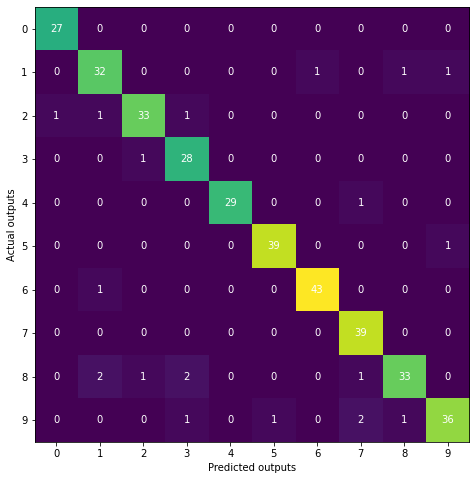

In [42]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

